# Predicting Heart Disease Using Machine Learning algorithms

This notebook has as the main goal classify the presence or absence of heart disease in the patient based on some factors. Some ML algorithms were used for this purpose.  

Mainly topics that are involved in this notebook are:
* Exploratory analysis
* Preprocessing data
* Model training
* Modelo evaluation
* Hyperparameter tunning (k-fold Cross Validation)
* Modelo Comparision

The dataset is popular on Kaggle, and it is available at https://www.kaggle.com/ronitf/heart-disease-uci. 

The dataset is relatively easy to work with since it does not have missing data and few features and observations. 




## Importing the dataset

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [108]:
data = pd.read_csv('/content/drive/MyDrive/datasets/Heart/heart.csv')

In [109]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


## Exploratory analysis

In [5]:
plt.style.use('ggplot')

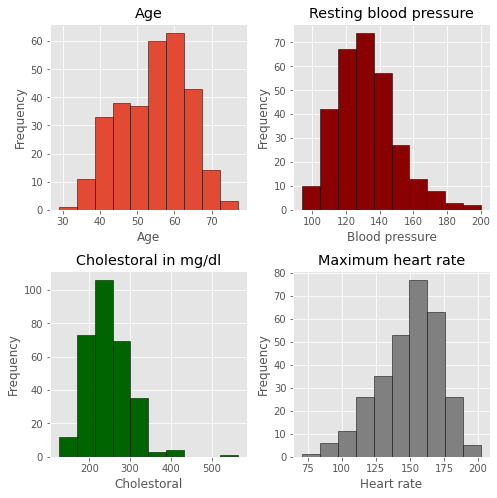

In [142]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.hist(data['age'], edgecolor = 'black')
ax2.hist(data['trestbps'], edgecolor = 'black',color = 'darkred', histtype = 'barstacked')
ax3.hist(data['chol'], edgecolor = 'black',color = 'darkgreen', histtype = 'barstacked')
ax4.hist(data['thalach'], edgecolor = 'black',color = 'grey', histtype = 'barstacked')
ax1.set_title('Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax2.set_title('Resting blood pressure')
ax2.set_xlabel('Blood pressure')
ax2.set_ylabel('Frequency')
ax3.set_title('Cholestoral in mg/dl')
ax3.set_xlabel('Cholestoral')
ax3.set_ylabel('Frequency')
ax4.set_title('Maximum heart rate')
ax4.set_xlabel('Heart rate')
ax4.set_ylabel('Frequency')
fig.tight_layout(pad=1.0)
plt.show()

In [110]:
cont = data['target'].value_counts()
cont

1    165
0    138
Name: target, dtype: int64

In [111]:
casos = [cont[1], cont[0]]
lab = ['Presence', 'Absence']

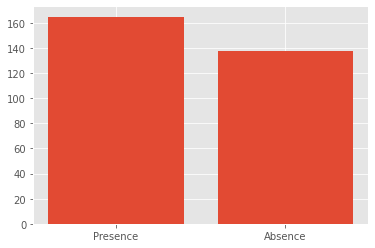

In [112]:
plt.bar( lab, casos)
plt.show()

In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

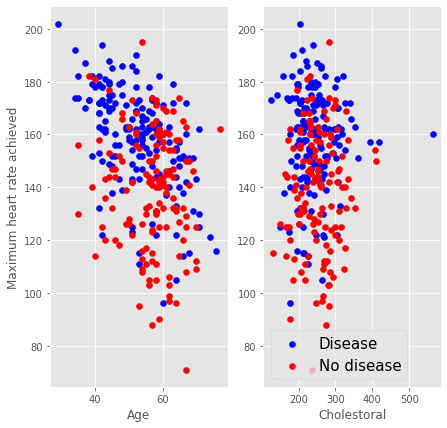

In [12]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(data['age'][data['target'] ==1], data['thalach'][data['target'] ==1], color = 'blue')
ax1.scatter(data['age'][data['target'] ==0], data['thalach'][data['target'] ==0], color = 'red')
ax2.scatter(data['chol'][data['target'] ==1], data['thalach'][data['target'] ==1], color = 'blue')
ax2.scatter(data['chol'][data['target'] ==0], data['thalach'][data['target'] ==0], color = 'red')
ax1.set_xlabel('Age')
ax2.set_xlabel('Cholestoral')
ax1.set_ylabel('Maximum heart rate achieved')
plt.legend(['Disease','No disease'], fontsize = 15)
plt.show()

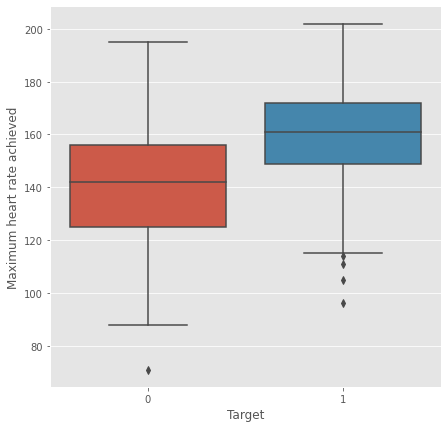

In [113]:
fig = plt.figure(figsize=(7,7))
ax = sns.boxplot(x = data['target'], y = data['thalach'])
ax.set(xlabel = 'Target', ylabel = 'Maximum heart rate achieved')
plt.show()

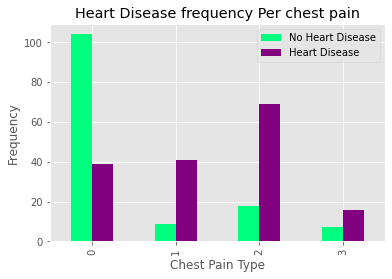

In [114]:
pd.crosstab(data['cp'], data['target']).plot(kind = 'bar', color=['springgreen','purple'])
plt.title('Heart Disease frequency Per chest pain')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.legend(['No Heart Disease','Heart Disease'])


In [31]:
data.groupby(['cp'])['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

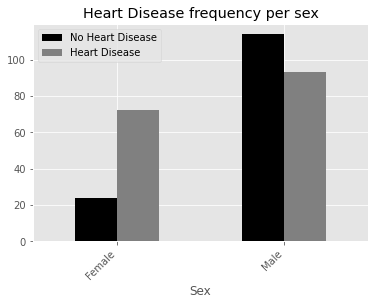

In [115]:
pd.crosstab(data['sex'], data['target']).plot(kind = 'bar', color = ['black', 'grey'])
labels = ['Female', 'Male']
plt.title('Heart Disease frequency per sex')
plt.xlabel('Sex')
plt.legend(['No Heart Disease','Heart Disease'])
locs, label = plt.xticks()
plt.xticks(locs,labels, rotation=45, horizontalalignment='right')
plt.show()

In [32]:
data.groupby(['sex'])['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

## Preprocessing the data

In [116]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [2,10, 11,12])], remainder = 'passthrough')

In [118]:
X = np.array(ct.fit_transform(X))

In [119]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [120]:
print(y_train.shape)
np.sum(y_train)

(242,)


132

In [121]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,[16,18,19,22,24]] = sc.fit_transform(X_train[:,[16,18,19,22,24]])
X_test[:,[16,18,19,22,24]] = sc.transform(X_test[:,[16,18,19,22,24]])

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

## KNN

In [123]:
from sklearn.model_selection import cross_val_score
for i in np.arange(4,20):
  classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p =2)
  accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
  print("Accuracy with k = " + str(i)+ ": %.2f" % np.mean(accuracies))

Accuracy with k = 4: 0.81
Accuracy with k = 5: 0.82
Accuracy with k = 6: 0.81
Accuracy with k = 7: 0.83
Accuracy with k = 8: 0.82
Accuracy with k = 9: 0.82
Accuracy with k = 10: 0.83
Accuracy with k = 11: 0.83
Accuracy with k = 12: 0.82
Accuracy with k = 13: 0.83
Accuracy with k = 14: 0.81
Accuracy with k = 15: 0.82
Accuracy with k = 16: 0.80
Accuracy with k = 17: 0.83
Accuracy with k = 18: 0.82
Accuracy with k = 19: 0.83


## Logistic  Regression

In [125]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))


Accuracy: 85.15 %


## Support Vector Machine

In [133]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', C = 2)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))


Accuracy: 84.75 %


In [129]:
classifier = SVC(kernel = 'poly',degree = 3, C = 2,random_state = 0)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 83.09 %


In [130]:
classifier = SVC(kernel = 'rbf', random_state = 0)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 83.51 %


## Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', max_depth=2,random_state = 0)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 83.94 %


## Hyperparameter tunning

### SVM

In [80]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
classifier = SVC()

In [81]:
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring='accuracy', cv = 5, n_jobs =- 1)

In [82]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
                         {'C': [0.25, 0.5, 0.75, 1],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [83]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 85.99 %
Best Parameters: {'C': 0.25, 'kernel': 'linear'}


### Random Forest

In [136]:
parameters ={"criterion" : ['gini', 'entropy'] ,
             "n_estimators" : [30,50,70,90,110,150],
        "max_depth" : [2,3,4,5]
       }
classifier 
classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring='accuracy', cv = 5, n_jobs =- 1)


In [138]:
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 84.75 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 90}


The best models under the 5-fold cross validation were

Model               | Accuracy \\
Logistic Regression | 85.15% \\
SVM (linear kernel) | 85.99% \\
Random Forest       | 84.75 % \\

## Final models

In [132]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lraccuracy = accuracy_score(y_test, y_pred)
print(lraccuracy)

0.8852459016393442


In [134]:
svm = SVC(kernel = 'linear', C = 0.25)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svmaccuracy = accuracy_score(y_test, y_pred)
print(svmaccuracy)

0.8360655737704918


In [141]:
rf = RandomForestClassifier(n_estimators = 90, criterion = 'entropy', max_depth = 4)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rfaccuracy = accuracy_score(y_test, y_pred)
print(rfaccuracy)

0.8032786885245902
